In [0]:
!pip uninstall tensorflow

In [0]:
!pip install tensorflow-gpu

In [0]:
import tensorflow as tf
import numpy as np

In [45]:
tf.__version__

'2.0.0'

In [46]:
if tf.test.is_gpu_available():
    print("\nYour GPU is available to TensorFlow\n")
else:
    print("\nYour GPU is NOT available to TensorFlow\n")


Your GPU is available to TensorFlow



In [47]:
print(('Is your GPU available for use?\n{0}').format(
    'Yes, your GPU is available: True' if tf.test.is_gpu_available() == True else 'No, your GPU is NOT available: False'
))

Is your GPU available for use?
Yes, your GPU is available: True


In [0]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import AveragePooling2D, Conv2D
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.initializers import RandomNormal
import matplotlib.pyplot as plt


**Download and prepare the CIFAR10 dataset**

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class.

The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.


In [0]:
# Download CIFAR 10 dataset-
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [0]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [51]:
print("\nTraining and testing shapes are:")
print("X_train.shape = {0}, y_train.shape = {1}".format(X_train.shape, y_train.shape))
print("X_test.shape = {0}, y_test.shape = {1}\n".format(X_test.shape, y_test.shape))


Training and testing shapes are:
X_train.shape = (50000, 32, 32, 3), y_train.shape = (50000, 1)
X_test.shape = (10000, 32, 32, 3), y_test.shape = (10000, 1)



**Verify the data**

To verify that the dataset looks correct, let's plot the first 15 images from the training set and display the class name below each image.

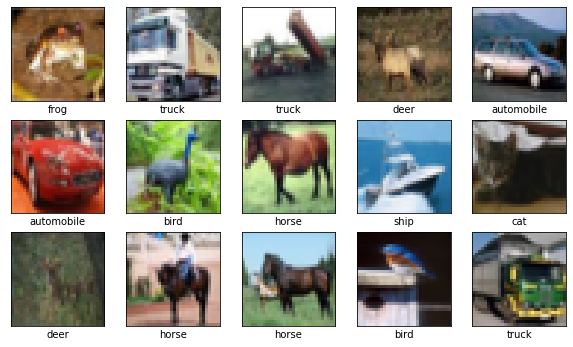

In [52]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))

for i in range(15):
  plt.subplot(5, 5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  # The CIFAR labels happen to be arrays, 
  # which is why you need the extra index
  plt.xlabel(class_names[y_train[i][0]])

plt.show()

**Create the convolutional base**

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size, color_channels refers to (R,G,B).

In this example, the CNN is designed to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to our first layer.

**Formulas for CNN**:

1.) Output size (O) of a convolution operations is-

    O = ((W - K + (2 * P) / S) + 1

where, W is input height/width, K is filter size, P is zero padding size and S is stride size


2.) Output size of a maxpool layer is-

    W' = ((W - f) / S) + 1

    H' = ((H - f) / S) + 1

where, W is input width, H is input height, f is pool/filter size and S is stride size



In [53]:
model = models.Sequential()

# Input: (32, 32, 3)
model.add(layers.Conv2D(
    filters = 32, kernel_size = (3, 3),
    activation='relu', kernel_initializer = tf.initializers.GlorotUniform(),
    strides = (1, 1), padding = 'valid',
    input_shape=(32, 32, 3))
)

'''
K = 3 (3, 3) or, filter size
S = 1 or, stride size
P = 0 or, zerro padding
'''
# Output: (30, 30, 32)

# Input: (30, 30, 32)
model.add(layers.MaxPooling2D(
    pool_size = (2, 2),
    strides = (2, 2))
)

'''
f = 2 (2, 2) or, filter/pool size
S = 2 or, stride size
'''
# Output: (15, 15, 32)

# Input: (15, 15, 32)
model.add(layers.Conv2D(
    filters = 64, kernel_size = (3, 3),
    activation='relu', kernel_initializer = tf.initializers.GlorotUniform())
)

'''
K = 3 or, (3, 3) or, filter size
P = 0 or, zero padding
S = 1 or, (1, 1) or, stide
'''
# Output: (13, 13, 64)

# Input: (13, 13, 64)
model.add(layers.MaxPooling2D(
    pool_size = (2, 2),
    strides = (2, 2))
)

'''
f = (2, 2) or 2, or filter/pool size
S = (1, 1) or 1, or stride size
'''
# Output: (6, 6, 64)

# Input: (6, 6, 64)
model.add(layers.Conv2D(
    filters = 64, kernel_size = (3, 3),
    activation='relu', kernel_initializer = tf.initializers.GlorotUniform())
)

'''
K = 3 or, (3, 3) or, filter size
S = 1 or (1, 1) or, stride
P = 0 or zero padding
'''
# Output: (4, 4, 64)


# https://stackoverflow.com/questions/55322754/how-to-do-weight-initialization-by-xavier-rule-in-tensorflow-2-0

'\nK = 3 or, (3, 3) or, filter size\nS = 1 or (1, 1) or, stride\nP = 0 or zero padding\n'

In [54]:
# Architecture and output volumes from each of layers, till now-
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels).

The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64).

Typically, **as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer**.

**Add Dense layers on top**

To complete the CNN model, feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification.

**Dense layers take vectors as input (which are 1D)**, while the current output is a 3D tensor.

First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs and a softmax activation.



In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_initializer = tf.initializers.GlorotUniform()))
model.add(tf.keras.layers.Dropout(rate = 0.4))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
# Add early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)

In [57]:
# Complete architecture of designed CNN model-
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

As you can see, (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

Since, 4 x 4 x 64 = 1024.

In [0]:
# Compile defined model-
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

**categorical_crossentropy VS. sparse_categorical_crossentropy**

If your targets are one-hot encoded, use categorical_crossentropy.

Examples of one-hot encodings:

            [1,0,0]
            [0,1,0]
            [0,0,1]

But if your targets are integers, use sparse_categorical_crossentropy.

Examples of integer encodings (for the sake of completion):

            1
            2
            3




In [59]:
# Train model-
history = model.fit(x = X_train, y = y_train,
                    batch_size = 128, epochs=50,
                    callbacks=[callback],
                    validation_data=(X_test, y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 65us/sample - loss: 1.8180 - accuracy: 0.3249 - val_loss: 1.4799 - val_accuracy: 0.4643
Epoch 2/50
50000/50000 [==============================] - 3s 51us/sample - loss: 1.5084 - accuracy: 0.4532 - val_loss: 1.3117 - val_accuracy: 0.5409
Epoch 3/50
50000/50000 [==============================] - 3s 51us/sample - loss: 1.3608 - accuracy: 0.5119 - val_loss: 1.2119 - val_accuracy: 0.5723
Epoch 4/50
50000/50000 [==============================] - 3s 50us/sample - loss: 1.2716 - accuracy: 0.5489 - val_loss: 1.2219 - val_accuracy: 0.5531
Epoch 5/50
50000/50000 [==============================] - 3s 51us/sample - loss: 1.2022 - accuracy: 0.5761 - val_loss: 1.0517 - val_accuracy: 0.6280
Epoch 6/50
50000/50000 [==============================] - 3s 51us/sample - loss: 1.1397 - accuracy: 0.5994 - val_loss: 1.0257 - val_accuracy: 0.6407
Epoch 7/50
50000/50000 [==============================] 

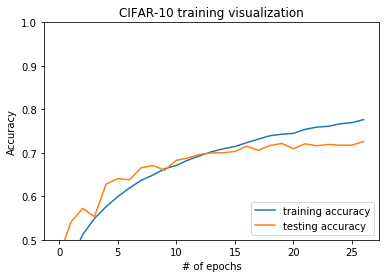

In [60]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label = 'testing accuracy')

plt.title("CIFAR-10 training visualization")
plt.xlabel('# of epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [61]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

10000/1 - 1s - loss: 1.1103 - accuracy: 0.7260


In [62]:
print("\nTesting dataset loss = {0:.4f} & accuracy = {1:.4f}\n".format(test_loss, test_acc))


Testing dataset loss = 0.8291 & accuracy = 0.7260



**Using TensorFlow GradientTape API**

In [0]:
# Using 'tf.data' to batch and shuffle the dataset-

train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train, y_train)).shuffle(10000).batch(128)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(128)

In [0]:
# Define a loss function-
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

In [0]:
# Define Gradient Descent optimizer-
optimizer = tf.keras.optimizers.Adam()

In [0]:
# Choosing metrics to measure the loss and the accuracy of the model.
# These metrics accumulate the values over epochs and then print the overall result

train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'train_accuracy')

test_loss = tf.keras.metrics.Mean(name = 'test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'test_accuracy')

In [0]:
# Using 'tf.GradientTape' to train the defined model-

@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # make predictions using defined model-
    predictions = model(images)

    # compute loss-
    loss = loss_object(labels, predictions)

  # compute gradient wrt loss-
  gradients = tape.gradient(loss, model.trainable_variables)

  # apply computed gradients to weights & biases of model-
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # accumulate chosen metrics over epochs-
  train_loss(loss)
  train_accuracy(labels, predictions)

  return None

In [0]:
# Function to test the model-

@tf.function
def test_step(images, labels):
  # make predictions using defined model-
  predictions = model(images)

  # compute loss-
  test_loss_val = loss_object(labels, predictions)

  # accumulate chosen metrics-
  test_loss(test_loss_val)
  test_accuracy(labels, predictions)

  return None


In [0]:
EPOCHS = 25

In [70]:
for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Training Loss: {}, Training Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, Training Loss: 0.5728324055671692, Training Accuracy: 79.2959976196289, Test Loss: 0.9153845310211182, Test Accuracy: 70.62000274658203
Epoch 2, Training Loss: 0.5416855216026306, Training Accuracy: 80.29399871826172, Test Loss: 0.9325942993164062, Test Accuracy: 71.12000274658203
Epoch 3, Training Loss: 0.5091399550437927, Training Accuracy: 81.49799346923828, Test Loss: 0.993395209312439, Test Accuracy: 69.93000030517578
Epoch 4, Training Loss: 0.48093363642692566, Training Accuracy: 82.54799

In [73]:
train_accuracy.result().numpy(), test_accuracy.result().numpy()

(0.94278, 0.68)

In [74]:
train_loss.result().numpy(), test_loss.result().numpy()

(0.15963307, 2.1329105)

**Observations**

From the above codes, we can see that the defined CNN model has overfitted to the dataset!
